<a href="https://colab.research.google.com/github/SaiDhanyaa/PROJECT_AIR_QUALITY/blob/main/EDA_FOR_PROJECT_FORECAST_AIR_QUALITY_CO2_EMISSIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***P-81 Air Quality forecasting(CO2 emissions) ***

**Business Objective:**
To forecast Co2 levels for an organization so that the organization can follow government norms with respect to Co2 emission levels.


# **EXPLORATORY DATA ANALYSIS**

In [64]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
##load the datasets
data= pd.read_excel('/content/CO2 dataset.xlsx')


In [66]:
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [67]:
#last few row of the data set
data.tail(10)

,Year,CO2
205,2005,17.3
206,2006,16.7
207,2007,16.8
208,2008,16.8
209,2009,15.9
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [68]:
#data structure
data.shape

(215, 2)

In [69]:
data.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [70]:
#data types
data.dtypes

Year      int64
CO2     float64
dtype: object

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [72]:
# here the data types of temp, year and month are correctly inferred.
## So no need for the data type conversion.

**TO FIND DUPLICATES**

In [73]:
 data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

In [74]:
data[ data.duplicated()].shape

(0, 2)

In [75]:
# there is no duplicated row

**OUTLIER DETECTION**

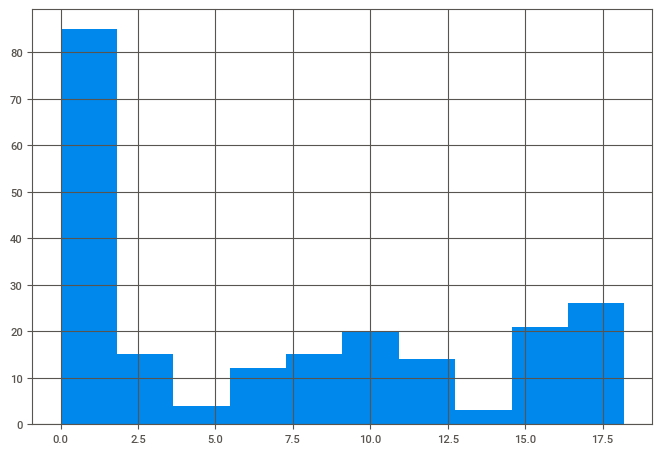

In [76]:
#USING HISTOGRAM
data['CO2'].hist()

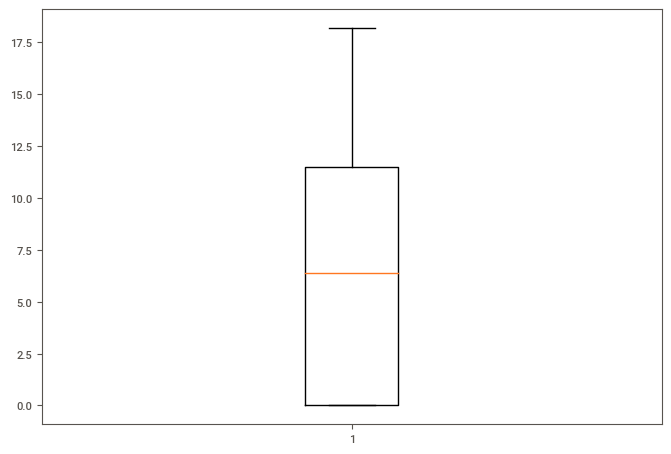

In [77]:
##boxplot
box = plt.boxplot(data.CO2)

In [78]:
## TO GET FLIERS(OUTLIERS):
[item.get_ydata() for item in box['fliers']]

[array([], dtype=float64)]

In [79]:
[item.get_ydata() for item in box['whiskers']]

[array([0.04, 0.  ]), array([11.5, 18.2])]

**DESCRIPTIVE STATISTICS**

In [80]:
data['CO2'].describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

**MISSING VALUES & IMPUTATION**

In [81]:
import seaborn as sns
cols=data.columns

In [82]:
colours=['#000099','#ffff00']

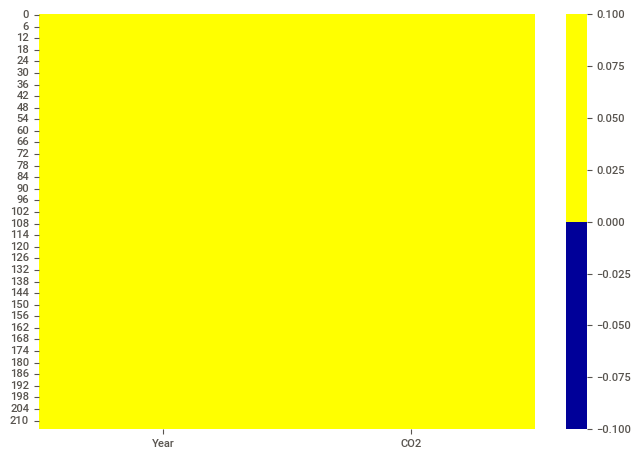

In [83]:
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [84]:
## there is no missing values.

**SCATTER PLOT AND CORRELATION ANALYSIS**

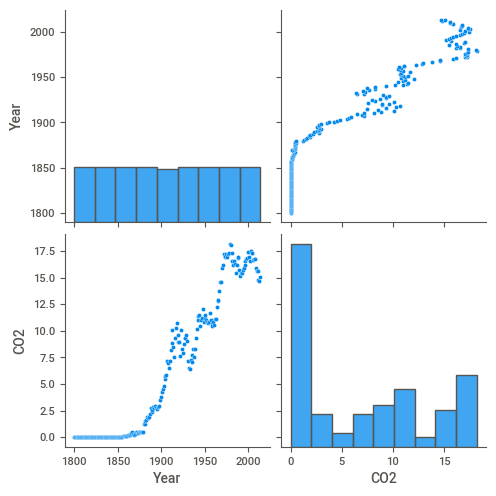

In [85]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [86]:
#Correlation
data.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


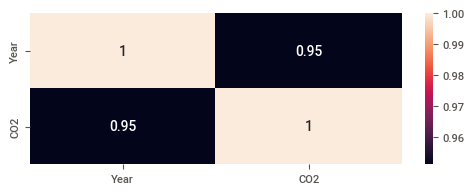

In [87]:
#### HEAT MAP FOR CORRELATION
plt.figure(figsize=(6,2))
sns.heatmap(data.corr(),annot=True)
plt.show()


**VISUALISATIONS**

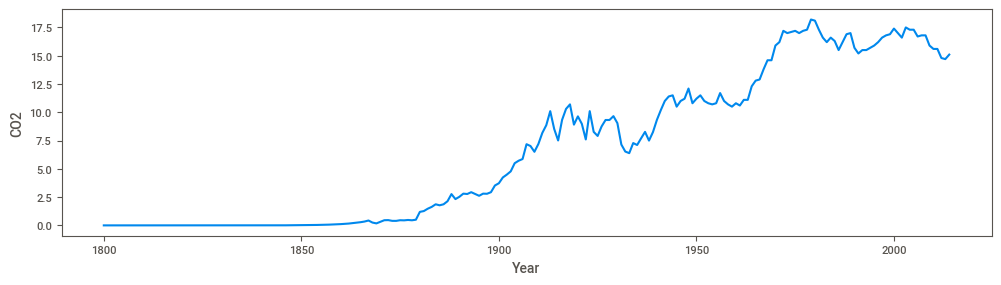

In [88]:
##line plot
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="CO2",data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


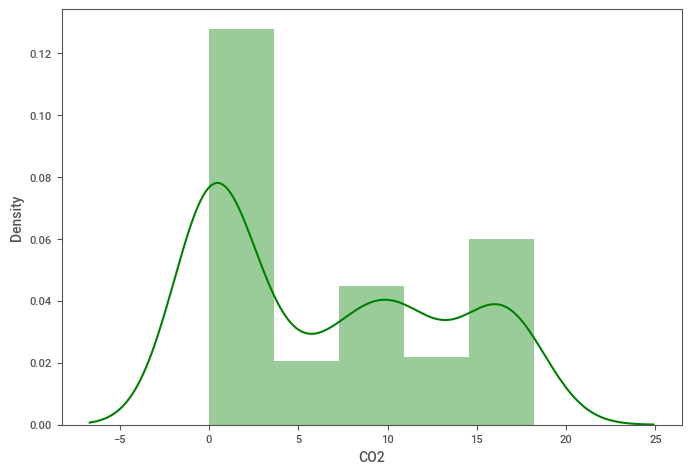

In [89]:
# Distribution plot for 'CO2'
sns.distplot(data['CO2'], color='green');

**AUTOMATE THE EDA PROCESS**

In [ ]:
!pip install pandas_profiling==2.7.1
!pip install sweetviz

In [91]:
# importing pandas_profiling
import pandas_profiling as pp

# importing sweetviz
import sweetviz as sv

In [92]:
## profiling the EDA report
EDA_report= pp.ProfileReport(data)

#export the report
EDA_report.to_file(output_file='AIR_QUALITY_EDA_Report.html')

Summarize dataset:   0%|          | 0/14 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
#analyzing the dataset
sweet_report=sv.analyze(data)

#display the report
sweet_report.show_html('AIR_QUALITY_SWEETVIZ_Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report AIR_QUALITY_SWEETVIZ_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
